In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pylab as plt
from scipy.stats import boxcox

### Download and Read data using pandas

In [3]:
coures = pd.read_csv('dataset/Course/all_courses.csv')
coures.head()

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
0,Data Engineering with AWS,nanodegree,"Learn to design data models, build data wareho...",intermediate,4 Months,4.6,1802.0,"AWS Glue, Amazon S3, AWS Data Warehouse, Re...","Intermediate Python, intermediate SQL & comman...",NaN,https://www.udacity.com/course/data-engineer-n...
1,Product Manager,nanodegree,Envision and execute the development of indust...,beginner,4 Months,4.7,864.0,"Product Strategy, Product Design, Product Deve...",No Experience Required,NaN,https://www.udacity.com/course/product-manager...
2,C++,nanodegree,Get hands-on experience building five real-wor...,intermediate,4 Months,4.5,1126.0,"Data Structures & Algorithms, Memory Managemen...",Intermediate Programming,NaN,https://www.udacity.com/course/c-plus-plus-nan...
3,Business Analytics,nanodegree,Gain foundational data skills like analyzing d...,beginner,3 Months,4.8,2649.0,"Excel & Spreadsheets, SQL, Data Visualization,...",NaN,Mode,https://www.udacity.com/course/business-analyt...
4,Data Scientist,nanodegree,"Build effective machine learning models, run d...",advanced,4 Months,4.7,1212.0,"Machine Learning, Deep Learning, Software Engi...","Python, SQL & Statistics","Bertelsmann, Figure Eight, IBM Watson, Insight...",https://www.udacity.com/course/data-scientist-...


In [85]:
coures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           267 non-null    object 
 1   Type            267 non-null    object 
 2   Description     261 non-null    object 
 3   Level           265 non-null    object 
 4   Duration        263 non-null    object 
 5   Rating          62 non-null     float64
 6   Review Count    62 non-null     float64
 7   Skills Covered  267 non-null    object 
 8   Prerequisites   77 non-null     object 
 9   Affiliates      138 non-null    object 
 10  URL             267 non-null    object 
dtypes: float64(2), object(9)
memory usage: 23.1+ KB


In [3]:
coures.shape

(267, 11)

### Handle missing values in 'Level', 'Duration', 'Review Count' and 'rating' columns

In [4]:
# check duplicate data with column name
coures[coures.duplicated()]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL


In [48]:
# check missing value
coures.isnull().sum()

Title               0
Type                0
Description         6
Level               2
Duration            4
Rating            205
Review Count      205
Skills Covered      0
Prerequisites     190
Affiliates        129
URL                 0
dtype: int64

In [6]:
# percentage of missing value
(coures.isnull().sum() / len(coures)) * 100

Title              0.000000
Type               0.000000
Description        2.247191
Level              0.749064
Duration           1.498127
Rating            76.779026
Review Count      76.779026
Skills Covered     0.000000
Prerequisites     71.161049
Affiliates        48.314607
URL                0.000000
dtype: float64

In [7]:
# index of missing value for Level
level_missing_index = coures[coures['Level'].isnull()].index.tolist()
level_missing_index

[217, 220]

In [8]:
coures.iloc[level_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
217,Configuring Linux Web Servers,free,NaN,NaN,1 Week,NaN,NaN,"Android Development, Firebase, Analytics",NaN,NaN,https://www.udacity.com/course/configuring-lin...
220,Passwordless Login Solutions for Android,free,NaN,NaN,1 Week,NaN,NaN,"Google Maps APIs, Static Maps, Street View ima...",NaN,Facebook for Developers,https://www.udacity.com/course/passwordless-lo...


In [20]:
train = coures.copy()

# fill up missing value using the most frequent value/ mode
impute_mode = SimpleImputer(strategy='most_frequent')
impute_mode.fit(train[['Level']])
train[['Level']] = impute_mode.transform(train[['Level']])

In [54]:
train.iloc[level_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
217,Configuring Linux Web Servers,free,NaN,intermediate,1 Week,NaN,NaN,"Android Development, Firebase, Analytics",NaN,NaN,https://www.udacity.com/course/configuring-lin...
220,Passwordless Login Solutions for Android,free,NaN,intermediate,1 Week,NaN,NaN,"Google Maps APIs, Static Maps, Street View ima...",NaN,Facebook for Developers,https://www.udacity.com/course/passwordless-lo...


In [55]:
coures['Duration'].isnull().sum()

4

In [57]:
# index of missing value for duration
duration_missing_index = coures[coures['Duration'].isnull()].index.tolist()
duration_missing_index

[126, 158, 174, 203]

In [58]:
coures.iloc[duration_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
126,Intro to Information Security,free,NaN,intermediate,NaN,NaN,NaN,"Software Security, Cryptography, Network Secur...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/intro-to-inform...
158,Compilers: Theory and Practice,free,This course teaches the theory and practice be...,intermediate,NaN,NaN,NaN,"Compilers, Semantic Analysis, Syntax Directed ...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/compilers-theor...
174,High Performance Computer Architecture,free,The HPCA course covers performance measurement...,advanced,NaN,NaN,NaN,"Processor Pipelining, Branch Prediction, Instr...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/high-performanc...
203,"Computability, Complexity & Algorithms",free,Learn tools and techniques that will help you ...,advanced,NaN,NaN,NaN,"Kotlin, Android",NaN,Georgia Institute of Technology,https://www.udacity.com/course/computability-c...


In [66]:
train = coures.copy()

# fillup missing value using most frequent / mode
impute_mode = SimpleImputer(strategy='most_frequent')
impute_mode.fit(train[['Duration']])
train[['Duration']] = impute_mode.transform(train[['Duration']])

In [67]:
train.iloc[duration_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
126,Intro to Information Security,free,NaN,intermediate,4 Months,NaN,NaN,"Software Security, Cryptography, Network Secur...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/intro-to-inform...
158,Compilers: Theory and Practice,free,This course teaches the theory and practice be...,intermediate,4 Months,NaN,NaN,"Compilers, Semantic Analysis, Syntax Directed ...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/compilers-theor...
174,High Performance Computer Architecture,free,The HPCA course covers performance measurement...,advanced,4 Months,NaN,NaN,"Processor Pipelining, Branch Prediction, Instr...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/high-performanc...
203,"Computability, Complexity & Algorithms",free,Learn tools and techniques that will help you ...,advanced,4 Months,NaN,NaN,"Kotlin, Android",NaN,Georgia Institute of Technology,https://www.udacity.com/course/computability-c...


In [72]:
coures['Review Count'].isnull().sum()

205

In [82]:
# index of missing value for Review Count
review_count_missing_index = coures[coures['Review Count'].isnull()].index.tolist()
review_count_missing_index

[16,
 19,
 54,
 59,
 60,
 61,
 65,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,


In [83]:
coures.iloc[review_count_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
16,Self-Driving Car Engineer,nanodegree,Learn the techniques that power self-driving c...,advanced,5 Months,NaN,NaN,"Computer Vision, Deep Learning, Sensor Fusion,...","Python, C++, Linear Algebra and Calculus","Waymo, Mercedes-Benz",https://www.udacity.com/course/self-driving-ca...
19,Data Engineering with Microsoft Azure,nanodegree,Master job-ready Azure skills like designing d...,intermediate,4 Months,NaN,NaN,"Database Normalization, Data Modeling Basics,...","Experience with SQL, Python, Azure, and Github",NaN,https://www.udacity.com/course/data-engineerin...
54,Digital Project Management,nanodegree,Build confidence translating business requirem...,beginner,1 Month,NaN,NaN,"Waterfall project management, Strategic commu...",Professional fluency in English,NaN,https://www.udacity.com/course/digital-project...
59,Ethical Hacker,nanodegree,"Learn how to find and exploit vulnerabilities,...",advanced,2 Months,NaN,NaN,"Vulnerability Management, Penetration Testing...","Linux, Networking, Programming and Window OS",NaN,https://www.udacity.com/course/ethical-hacker-...
60,RPA Developer with UiPath,nanodegree,Build the operational processes that enable th...,beginner,4 Months,NaN,NaN,"Process Automation, Business Operations, UiPat...",Basic familiarity with Microsoft applications ...,UiPath,https://www.udacity.com/course/rpa-developer-n...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,NaN,NaN,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,NaN,NaN,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,NaN,NaN,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,NaN,NaN,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [93]:
# KNN Imputer for handle numerical missing value
train_knn = coures.copy()

knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_knn[['Review Count' ,'Rating']] = knn_imputer.fit_transform(train_knn[['Review Count', 'Rating']])

In [94]:
train_knn.iloc[review_count_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
16,Self-Driving Car Engineer,nanodegree,Learn the techniques that power self-driving c...,advanced,5 Months,4.595161,714.887097,"Computer Vision, Deep Learning, Sensor Fusion,...","Python, C++, Linear Algebra and Calculus","Waymo, Mercedes-Benz",https://www.udacity.com/course/self-driving-ca...
19,Data Engineering with Microsoft Azure,nanodegree,Master job-ready Azure skills like designing d...,intermediate,4 Months,4.595161,714.887097,"Database Normalization, Data Modeling Basics,...","Experience with SQL, Python, Azure, and Github",NaN,https://www.udacity.com/course/data-engineerin...
54,Digital Project Management,nanodegree,Build confidence translating business requirem...,beginner,1 Month,4.595161,714.887097,"Waterfall project management, Strategic commu...",Professional fluency in English,NaN,https://www.udacity.com/course/digital-project...
59,Ethical Hacker,nanodegree,"Learn how to find and exploit vulnerabilities,...",advanced,2 Months,4.595161,714.887097,"Vulnerability Management, Penetration Testing...","Linux, Networking, Programming and Window OS",NaN,https://www.udacity.com/course/ethical-hacker-...
60,RPA Developer with UiPath,nanodegree,Build the operational processes that enable th...,beginner,4 Months,4.595161,714.887097,"Process Automation, Business Operations, UiPat...",Basic familiarity with Microsoft applications ...,UiPath,https://www.udacity.com/course/rpa-developer-n...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,4.595161,714.887097,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,4.595161,714.887097,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,4.595161,714.887097,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,4.595161,714.887097,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [99]:

coures['Rating'].isnull().index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [105]:
# index of missing value for Rating
rating_missing_index = coures[coures['Rating'].isnull()].index.tolist()
rating_missing_index

[16,
 19,
 54,
 59,
 60,
 61,
 65,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,


In [106]:
coures.iloc[rating_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
16,Self-Driving Car Engineer,nanodegree,Learn the techniques that power self-driving c...,advanced,5 Months,NaN,NaN,"Computer Vision, Deep Learning, Sensor Fusion,...","Python, C++, Linear Algebra and Calculus","Waymo, Mercedes-Benz",https://www.udacity.com/course/self-driving-ca...
19,Data Engineering with Microsoft Azure,nanodegree,Master job-ready Azure skills like designing d...,intermediate,4 Months,NaN,NaN,"Database Normalization, Data Modeling Basics,...","Experience with SQL, Python, Azure, and Github",NaN,https://www.udacity.com/course/data-engineerin...
54,Digital Project Management,nanodegree,Build confidence translating business requirem...,beginner,1 Month,NaN,NaN,"Waterfall project management, Strategic commu...",Professional fluency in English,NaN,https://www.udacity.com/course/digital-project...
59,Ethical Hacker,nanodegree,"Learn how to find and exploit vulnerabilities,...",advanced,2 Months,NaN,NaN,"Vulnerability Management, Penetration Testing...","Linux, Networking, Programming and Window OS",NaN,https://www.udacity.com/course/ethical-hacker-...
60,RPA Developer with UiPath,nanodegree,Build the operational processes that enable th...,beginner,4 Months,NaN,NaN,"Process Automation, Business Operations, UiPat...",Basic familiarity with Microsoft applications ...,UiPath,https://www.udacity.com/course/rpa-developer-n...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,NaN,NaN,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,NaN,NaN,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,NaN,NaN,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,NaN,NaN,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [115]:
train_knn = coures.copy()

# missing value handle using KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_knn[['Rating', 'Review Count']] = knn_imputer.fit_transform(train_knn[['Rating', 'Review Count']])
train_knn[['Rating', 'Review Count']]

,Rating,Review Count
0,4.600000,1802.000000
1,4.700000,864.000000
2,4.500000,1126.000000
3,4.800000,2649.000000
4,4.700000,1212.000000
...,...,...
262,4.595161,714.887097
263,4.595161,714.887097
264,4.595161,714.887097
265,4.595161,714.887097


In [114]:
train_knn.iloc[rating_missing_index]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
16,Self-Driving Car Engineer,nanodegree,Learn the techniques that power self-driving c...,advanced,5 Months,4.595161,714.887097,"Computer Vision, Deep Learning, Sensor Fusion,...","Python, C++, Linear Algebra and Calculus","Waymo, Mercedes-Benz",https://www.udacity.com/course/self-driving-ca...
19,Data Engineering with Microsoft Azure,nanodegree,Master job-ready Azure skills like designing d...,intermediate,4 Months,4.595161,714.887097,"Database Normalization, Data Modeling Basics,...","Experience with SQL, Python, Azure, and Github",NaN,https://www.udacity.com/course/data-engineerin...
54,Digital Project Management,nanodegree,Build confidence translating business requirem...,beginner,1 Month,4.595161,714.887097,"Waterfall project management, Strategic commu...",Professional fluency in English,NaN,https://www.udacity.com/course/digital-project...
59,Ethical Hacker,nanodegree,"Learn how to find and exploit vulnerabilities,...",advanced,2 Months,4.595161,714.887097,"Vulnerability Management, Penetration Testing...","Linux, Networking, Programming and Window OS",NaN,https://www.udacity.com/course/ethical-hacker-...
60,RPA Developer with UiPath,nanodegree,Build the operational processes that enable th...,beginner,4 Months,4.595161,714.887097,"Process Automation, Business Operations, UiPat...",Basic familiarity with Microsoft applications ...,UiPath,https://www.udacity.com/course/rpa-developer-n...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,4.595161,714.887097,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,4.595161,714.887097,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,4.595161,714.887097,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,4.595161,714.887097,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [120]:
coures['Level']

0      intermediate
1          beginner
2      intermediate
3          beginner
4          advanced
           ...     
262    intermediate
263    intermediate
264    intermediate
265    intermediate
266    intermediate
Name: Level, Length: 267, dtype: object

### Apply one-hot encoding for 'Level' column

In [53]:
level = coures['Level']

# create dataFrame
df = pd.DataFrame(level)

# one-hot algorithm for categorical data to numerical data
one_hot = pd.get_dummies(df['Level'], prefix='Level').astype(int)

one_hot

,Level_advanced,Level_beginner,Level_intermediate
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
262,0,0,1
263,0,0,1
264,0,0,1
265,0,0,1


In [55]:
# pd.concat([one_hot, df], axis=1) # show using concat

df = df.join(one_hot)
df

,Level,Level_advanced,Level_beginner,Level_intermediate
0,intermediate,0,0,1
1,beginner,0,1,0
2,intermediate,0,0,1
3,beginner,0,1,0
4,advanced,1,0,0
...,...,...,...,...
262,intermediate,0,0,1
263,intermediate,0,0,1
264,intermediate,0,0,1
265,intermediate,0,0,1


### Apply data bining for 'Rating' column

In [56]:
coures.nunique()

Title             266
Type                3
Description       257
Level               3
Duration           23
Rating              6
Review Count       58
Skills Covered    249
Prerequisites      68
Affiliates         48
URL               267
dtype: int64

In [63]:
train_knn['Rating'].min()

4.3

In [64]:
train_knn['Rating'].max()

4.8

In [65]:
train_knn.isnull().sum()

Title               0
Type                0
Description         6
Level               2
Duration            4
Rating              0
Review Count        0
Skills Covered      0
Prerequisites     190
Affiliates        129
URL                 0
dtype: int64

In [77]:
# create a new column
new_rating = train_knn['Rating']
df = pd.DataFrame(new_rating)

# create data bining labels
cut_lables = ['below_average', 'average', 'above_average', 'good']

#define cut range
cut_bins = [4.3, 4.4, 4.5, 4.6, 4.8]

# make bining by using cut (convert numerical to categorical data with a range)
df['Rating Bining'] = pd.cut(df['Rating'], bins=cut_bins, labels=cut_lables)
df.head()

,Rating,Rating Bining
0,4.6,above_average
1,4.7,good
2,4.5,average
3,4.8,good
4,4.7,good


### Apply boxcox transformer for 'Review Count' column and plot the distribution (before and after transformer)

In [39]:
coures['Review Count'].isnull().sum()

# KNN Imputer for handle numerical missing value
train_knn = coures.copy()

knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_knn[['Review Count' ,'Rating']] = knn_imputer.fit_transform(train_knn[['Review Count', 'Rating']])

train_knn = train_knn[train_knn['Review Count'] > 0]
train_knn['Review Count']

0      1802.000000
1       864.000000
2      1126.000000
3      2649.000000
4      1212.000000
          ...     
262     714.887097
263     714.887097
264     714.887097
265     714.887097
266     714.887097
Name: Review Count, Length: 267, dtype: float64

lmbda:  0.41159999716685663


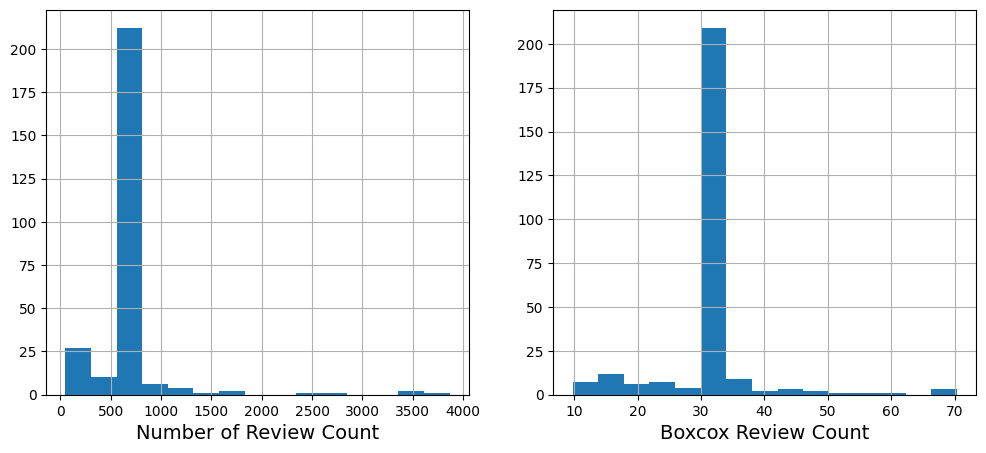

In [46]:
y = train_knn['Review Count']
y, fitted_lambda = boxcox(y, lmbda=None)

print("lmbda: ", fitted_lambda)

train_knn['boxcox_review_count'] = y

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# x axis label
ax1.set_xlabel("Number of Review Count", fontsize=14)
ax2.set_xlabel("Boxcox Review Count", fontsize=14)

# plot data to histogram graph
train_knn['Review Count'].hist(ax=ax1, bins=15)
train_knn['boxcox_review_count'].hist(ax=ax2, bins=15)

plt.show()